In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [234]:
universe_df = pd.read_csv(r"C:\Users\WeeKe\Desktop\Stock_Universe.csv")
fama_df = pd.read_csv("Fama-French.csv")

In [235]:
universe_df

,gvkey,iid,datadate,tic,trt1m,naics,sic
0,1000,01,30/09/1970,AE.2,NaN,NaN,3089.0
1,1000,01,31/10/1970,AE.2,6.3830,NaN,3089.0
2,1000,01,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,1000,01,31/12/1970,AE.2,11.1111,NaN,3089.0
4,1000,01,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...,...,...
7560347,352257,01C,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,352257,01C,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,352257,01C,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,353444,90,31/07/2022,HLN,NaN,325412.0,2834.0


In [236]:
universe_df.drop(columns = ["gvkey", "iid"])

,datadate,tic,trt1m,naics,sic
0,30/09/1970,AE.2,NaN,NaN,3089.0
1,31/10/1970,AE.2,6.3830,NaN,3089.0
2,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,31/12/1970,AE.2,11.1111,NaN,3089.0
4,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...
7560347,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,31/07/2022,HLN,NaN,325412.0,2834.0


In [237]:
universe_df["tic"].unique()

array(['AE.2', 'AMFD.', 'AAIC.1', ..., 'HXLTF', 'HX.', 'HLN'],
      dtype=object)

In [238]:
len(universe_df["tic"].unique())

56123

In [239]:
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,31/01/1962,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,28/02/1962,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,30/03/1962,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,30/04/1962,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,31/05/1962,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,31/03/2022,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,29/04/2022,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,31/05/2022,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,30/06/2022,-0.0843,0.0209,-0.0597,0.0006,0.0079


# Cleaning Fama

In [240]:
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,31/01/1962,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,28/02/1962,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,30/03/1962,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,30/04/1962,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,31/05/1962,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,31/03/2022,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,29/04/2022,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,31/05/2022,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,30/06/2022,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [241]:
fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,1962-03-30,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,2022-04-29,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,2022-06-30,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [242]:
fama_df.set_index("dateff", inplace=True)

# Filtering Universe of Stocks

## Sin Stocks

In [243]:
sic_beverages = [2080, 2082, 2083, 2084, 2085] 
sic_smoke = [x for x in range(2100, 2200)]

naics_sin = [7132, 713210, 71329, 713290, 72112, 721120]
sic_sin = sic_beverages + sic_smoke

In [244]:
len(universe_df[universe_df["sic"].isin(sic_sin)].tic.unique())

198

In [245]:
len(universe_df[universe_df["naics"].isin(naics_sin)].tic.unique())

154

In [246]:
sin_stocks = universe_df[((universe_df["sic"].isin(sic_sin)) | (universe_df["naics"].isin(naics_sin)))]

In [247]:
sin_stocks

In [218]:
len(sin_stocks["tic"].unique())

352

In [219]:
# Changing to datetime format
sin_stocks["datadate"] = pd.to_datetime(sin_stocks["datadate"])
sin_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0


In [220]:
# Transforming returns to pct values
sin_stocks["monthly_pct_returns"] = sin_stocks["trt1m"] / 100
sin_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_pct_returns
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0,NaN
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


In [168]:
sin_pivot = sin_stocks.pivot(index = "datadate", columns = "tic", values = "monthly_pct_returns")
sin_pivot

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.167548,0.129366,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075


In [169]:
from pandas.tseries.offsets import MonthEnd
sin_pivot.index = sin_pivot.index + MonthEnd(0)
sin_pivot

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.167548,0.129366,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075


# Sin Portfolio

## Finding active stocks in each month

In [170]:
sin_portfolio = sin_pivot.copy()
sin_portfolio["Num_Active_Stocks"] = len(sin_stocks["tic"].unique()) - sin_portfolio.isnull().sum(axis = 1)
sin_portfolio["Portfolio_Proportion"] = 1/sin_portfolio["Num_Active_Stocks"]

sin_portfolio

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Num_Active_Stocks,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,inf
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.100000
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145,107,0.009346
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973,107,0.009346
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075,108,0.009259


## Multiplying each row by its respective portfolio proportions

In [171]:
portfolio_returns = sin_portfolio.mul(sin_portfolio["Portfolio_Proportion"], axis = 0)
portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
portfolio_returns

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002511,-0.000524,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002608,-0.000157,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001551,0.001198,NaN,NaN,NaN,NaN,NaN,0.000118,-0.000299,0.001056


In [172]:
portfolio_returns["Portfolio_Returns"] = portfolio_returns.sum(axis = 1)
portfolio_returns["Portfolio_Proportion"] = sin_portfolio["Portfolio_Proportion"]
sin_portfolio_merged = pd.concat([sin_portfolio[["Num_Active_Stocks"]], portfolio_returns], axis = 1, join = "inner")

sin_portfolio_merged

tic,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Portfolio_Returns,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,inf
1962-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016444,0.100000
1962-03-31,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011945,0.076923
1962-04-30,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073594,0.076923
1962-05-31,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.138066,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581,-0.032238,0.009346
2022-06-30,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289,121.435758,0.009346
2022-07-31,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000118,-0.000299,0.001056,2.030022,0.009259


In [173]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

sin_portfolio_merged = sin_portfolio_merged[moved_cols + [col for col in sin_portfolio_merged.columns if col not in moved_cols]]
sin_portfolio_merged.head()

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0.000000,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
sin_portfolio_merged.describe()["Portfolio_Returns"]

count      729.000000
mean        19.059838
std        504.510007
min         -0.257608
25%         -0.008865
50%          0.024869
75%          0.075842
max      13621.558547
Name: Portfolio_Returns, dtype: float64

## Removing periosd where there are no returns

In [175]:
sin_portfolio_merged[sin_portfolio_merged["Portfolio_Returns"] == 0]

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0.0,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,0.0,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
sin_portfolio_merged = sin_portfolio_merged.loc[~(sin_portfolio_merged["Portfolio_Returns"] == 0)]
sin_portfolio_merged

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.052827,0.076923,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,0.833315,0.009091,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000660,-0.000645,NaN,NaN,NaN,NaN,NaN,0.000231,-0.001346,-0.001056
2022-05-31,-0.032238,0.009346,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002511,-0.000524,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581
2022-06-30,121.435758,0.009346,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002608,-0.000157,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289


In [177]:
sin_portfolio_merged.loc["2022-01-31"]

tic
Portfolio_Returns       13621.558547
Portfolio_Proportion        0.008621
Num_Active_Stocks         116.000000
2788A                            NaN
3157B                            NaN
                            ...     
WIMHY                            NaN
WNWN                             NaN
WVVI                        0.000100
WYNMY                       0.000878
WYNN                        0.000042
Name: 2022-01-31 00:00:00, Length: 355, dtype: float64

# Sin Regression

In [178]:
sin_returns = sin_portfolio_merged[["Portfolio_Returns"]]
sin_returns

tic,Portfolio_Returns
datadate,
1962-02-28,0.016444
1962-03-31,-0.011945
1962-04-30,-0.073594
1962-05-31,-0.138066
1962-06-30,-0.052827
...,...
2022-04-30,0.833315
2022-05-31,-0.032238
2022-06-30,121.435758


In [179]:
fama_df.index = fama_df.index + MonthEnd(0)
fama_df

,mktrf,smb,hml,rf,umd
dateff,,,,,
1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...
2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248


In [180]:
sin_model_df = pd.concat([sin_returns, fama_df], axis = 1, join = "inner")
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646
...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [181]:
sin_model_df["Portfolio_Excess_Returns"] = sin_model_df["Portfolio_Returns"] - sin_model_df["rf"]
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158


In [182]:
sin_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [183]:
sin_model_df

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158


# Including Recession Indicator

In [184]:
recession = pd.read_csv("USREC.csv")

In [185]:
recession["DATE"] = pd.to_datetime(recession["DATE"])
recession["DATE"] = recession["DATE"] + MonthEnd(0)
recession

,DATE,USREC
0,1854-12-31,1
1,1855-01-31,0
2,1855-02-28,0
3,1855-03-31,0
4,1855-04-30,0
...,...,...
2008,2022-04-30,0
2009,2022-05-31,0
2010,2022-06-30,0
2011,2022-07-31,0


In [186]:
recession.set_index("DATE", inplace=True)

In [187]:
sin_model_df2 = pd.concat([sin_model_df, recession], axis = 1, join = "inner")
sin_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444,0
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945,0
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794,0
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466,0
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827,0
...,...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548,0
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215,0
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538,0
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158,0


# Plots

In [192]:
sin_model_df2.loc[sin_model_df2["Portfolio_Returns"].idxmax()]

Portfolio_Returns           13621.558547
ExRm                           -0.062500
SMB                            -0.059400
HML                             0.127500
rf                              0.000000
MOM                            -0.025900
Portfolio_Excess_Returns    13621.558547
USREC                           0.000000
Name: 2022-01-31 00:00:00, dtype: float64

<AxesSubplot:title={'center':'Portfolio Excess Returns with US Recession Indicator on secondary y axis'}>

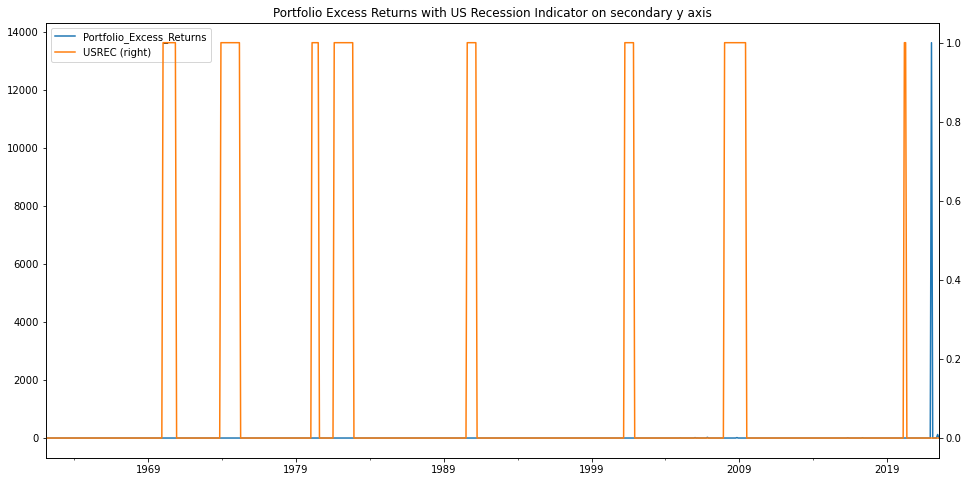

In [202]:
sin_model_df2[["Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Portfolio Excess Returns with US Recession Indicator on secondary y axis")

## Comparables

In [28]:
sic_comparables = [x for x in range(2000, 2047)] + [x for x in range(2050, 2064)] + [x for x in range(2070, 2080)] + [2090, 2091, 2092, 2095, 2099] + [x for x in range(2064, 2069)] + [2087, 2096, 2097]

sic_comparables += [x for x in range(7800, 7830)] + [x for x in range(7830, 7834)] + [7840, 7841, 7900, 7910, 7911] + [x for x in range(7920, 7930)] + [x for x in range(7930, 7934)] + [x for x in range(7940,7950)] + [7980] + [x for x in range(7990, 8000)]

sic_comparables += [x for x in range(5800, 5820)] + [x for x in range(5820, 5830)] + [x for x in range(5890, 5900)] + [7000] + [x for x in range(7010, 7020)] + [x for x in range(7040, 7050)] + [7213]

sic_comparables

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2090,
 2091,
 2092,
 2095,
 2099,
 2064,
 2065,
 2066,
 2067,
 2068,
 2087,
 2096,
 2097,
 7800,
 7801,
 7802,
 7803,
 7804,
 7805,
 7806,
 7807,
 7808,
 7809,
 7810,
 7811,
 7812,
 7813,
 7814,
 7815,
 7816,
 7817,
 7818,
 7819,
 7820,
 7821,
 7822,
 7823,
 7824,
 7825,
 7826,
 7827,
 7828,
 7829,
 7830,
 7831,
 7832,
 7833,
 7840,
 7841,
 7900,
 7910,
 7911,
 7920,
 7921,
 7922,
 7923,
 7924,
 7925,
 7926,
 7927,
 7928,
 7929,
 7930,
 7931,
 7932,
 7933,
 7940,
 7941,
 7942,
 7943,
 7944,
 7945,

In [29]:
comparable_stocks = universe_df[universe_df["sic"].isin(sic_comparables)]
comparable_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
95,1001,01,30/09/1983,AMFD.,NaN,722.0,5812.0
96,1001,01,31/10/1983,AMFD.,10.2041,722.0,5812.0
97,1001,01,30/11/1983,AMFD.,18.5185,722.0,5812.0
98,1001,01,31/12/1983,AMFD.,-9.3750,722.0,5812.0
99,1001,01,31/01/1984,AMFD.,10.3448,722.0,5812.0
...,...,...,...,...,...,...,...
6967395,351371,01C,31/08/2019,ODD.,-36.8421,722513.0,5812.0
6967396,351371,01C,30/09/2019,ODD.,0.0000,722513.0,5812.0
6967397,351371,01C,31/10/2019,ODD.,-16.6667,722513.0,5812.0
6967398,351371,01C,30/11/2019,ODD.,40.0000,722513.0,5812.0


In [30]:
len(comparable_stocks["tic"].unique())

1981